## Observations and Insights 

In [ ]:
# 1) Capomulin and Ramicane regimens were the most successful in decreasing tumor volume over the course of the study.
# 2) Most other regimens were largely comparable to the placebo treatment with respect to tumor volume.
# 3) Mouse weight and tumor volume had a strong positive correlation in this study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_metadata_path)
study = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse, study, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df["Mouse ID"].value_counts()
#g989 has duplicate entries

g989    13
j119    10
m269    10
b742    10
g288    10
        ..
h428     1
u153     1
v199     1
x336     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = merge_df.loc[(merge_df["Mouse ID"] == "g989")]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(merge_df.index[908:921])
check_df = clean_df.loc[(clean_df["Mouse ID"] == "g989")]
check_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regi_df = clean_df.groupby(["Drug Regimen"])
regi_df.mean()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = regi_df["Tumor Volume (mm3)"].mean()
tumor_median = regi_df["Tumor Volume (mm3)"].median()
tumor_stddev = regi_df["Tumor Volume (mm3)"].std()
tumor_var = regi_df["Tumor Volume (mm3)"].var()
tumor_sem = regi_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_sum = pd.DataFrame ({
        "Mean Tumor Volume" : tumor_mean,
        "Median Tumor Volume" : tumor_median,
        "Tumor Variance" : tumor_var,
        "Tumor Standard Deviation" : tumor_stddev,
        "Tumor Standard Error" : tumor_sem
}
)

tumor_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Standard Deviation,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regi_df["Tumor Volume (mm3)"].agg(['mean','median','var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements Taken')

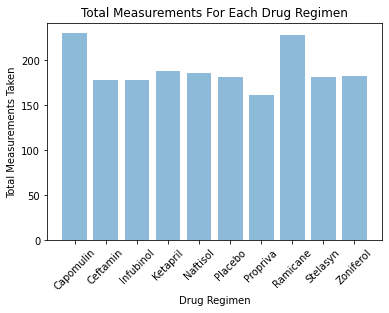

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drug_counts = [len(merge_df.loc[(merge_df["Drug Regimen"] == drug)]) for drug in drugs]
x_axis = np.arange(len(drugs))
plt.bar(drugs, drug_counts, alpha=0.5, align="center")
tick_locations = [value for value in drugs]
plt.xticks(tick_locations, drugs, rotation = 45)
plt.title("Total Measurements For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

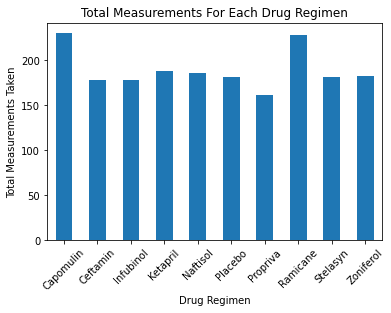

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure_sum = pd.DataFrame({
    "Drug Regimen" : drugs,
    "Total Measurements Taken" : drug_counts
}
)

measure_sum = measure_sum.set_index("Drug Regimen")
measure_sum.plot(kind="bar", rot = 45, legend = False, title = "Total Measurements For Each Drug Regimen",
                ylabel = "Total Measurements Taken")
plt.tight_layout

Text(0, 0.5, 'Sex')

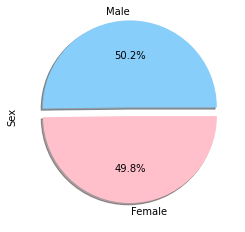

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = ["Male", "Female"]
#sex_counts = [len(mouse.loc[(mouse["Sex"] == x)]) for x in sex]
sex_counts = mouse["Sex"].value_counts()
colors = ["lightskyblue", "pink"]
explode = (0.1, 0)

plt.pie(sex_counts, explode = explode, labels = sex, colors = colors, autopct="%1.1f%%", shadow = True)
plt.ylabel("Sex")

<AxesSubplot:ylabel='Sex'>

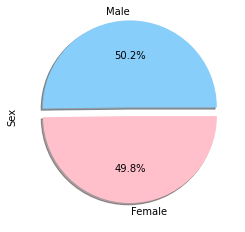

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts.plot(kind="pie", y="Sex", shadow = True, explode = (0.1,0), colors = ["lightskyblue", "pink"], autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo_df = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin")]
rami_df = merge_df.loc[(merge_df["Drug Regimen"] == "Ramicane")]
infu_df = merge_df.loc[(merge_df["Drug Regimen"] == "Infubinol")]
ceft_df = merge_df.loc[(merge_df["Drug Regimen"] == "Ceftamin")]

capo_sort = capo_df.sort_values("Timepoint", ascending = False)
capo_sort_drop = capo_sort.drop_duplicates(subset=["Mouse ID"])
rami_sort = rami_df.sort_values("Timepoint", ascending = False)
rami_sort_drop = rami_sort.drop_duplicates(subset=["Mouse ID"])
infu_sort = infu_df.sort_values("Timepoint", ascending = False)
infu_sort_drop = infu_sort.drop_duplicates(subset=["Mouse ID"])
ceft_sort = ceft_df.sort_values("Timepoint", ascending = False)
ceft_sort_drop = ceft_sort.drop_duplicates(subset=["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_vol = capo_sort_drop[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
rami_vol = rami_sort_drop[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
infu_vol = infu_sort_drop[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
ceft_vol = ceft_sort_drop[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_vol_points = capo_vol["Tumor Volume (mm3)"]
rami_vol_points = rami_vol["Tumor Volume (mm3)"]
infu_vol_points = infu_vol["Tumor Volume (mm3)"]
ceft_vol_points = ceft_vol["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_quartiles = capo_vol_points.quantile([0.25,0.5,0.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq - capo_lowerq
capo_lower = capo_lowerq - (1.5 * capo_iqr) #20.7
capo_upper = capo_upperq + (1.5 * capo_iqr) #51.83

rami_quartiles = rami_vol_points.quantile([0.25,0.5,0.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq - rami_lowerq
rami_lower = rami_lowerq - (1.5 * rami_iqr) #17.91
rami_upper = rami_upperq + (1.5 * rami_iqr) #54.31

infu_quartiles = infu_vol_points.quantile([0.25,0.5,0.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lower = infu_lowerq - (1.5 * infu_iqr) #36.83
infu_upper = infu_upperq + (1.5 * infu_iqr) #82.74


ceft_quartiles = ceft_vol_points.quantile([0.25,0.5,0.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower = ceft_lowerq - (1.5 * ceft_iqr) #25.35
ceft_upper = ceft_upperq + (1.5 + ceft_iqr) #81.38

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

([<matplotlib.axis.XTick at 0x1ca3da28280>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

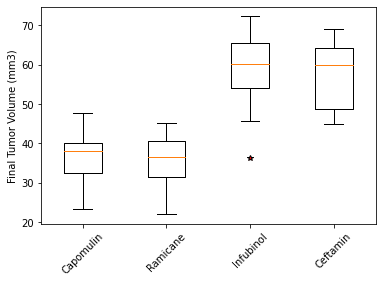

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
vol_points = [capo_vol_points, rami_vol_points, infu_vol_points, ceft_vol_points]
green_diamond = dict(markerfacecolor='red', marker='*')
plt.boxplot(vol_points, flierprops=green_diamond)
plt.ylabel("Final Tumor Volume (mm3)")
tick_locations = range(1,5)
plt.xticks(tick_locations, drugs, rotation = 45)

## Line and Scatter Plots

<AxesSubplot:title={'center':'Mouse s185 Tumor Volume Over Time (Capomulin Treated)'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

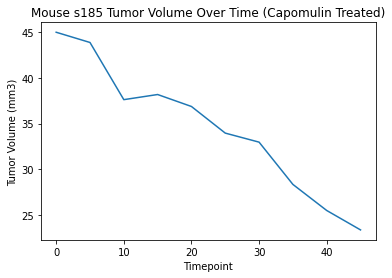

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_s185 = capo_df.loc[(capo_df["Mouse ID"] == "s185")]
capo_s185 = capo_s185[["Timepoint", "Tumor Volume (mm3)"]]
capo_s185 = capo_s185.set_index("Timepoint")
capo_s185.plot(kind="line", ylabel = "Tumor Volume (mm3)", title = "Mouse s185 Tumor Volume Over Time (Capomulin Treated)",
              legend = False)

<AxesSubplot:title={'center':'Tumor Volume vs. Mouse Weight for Capomulin Drug Regimen'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

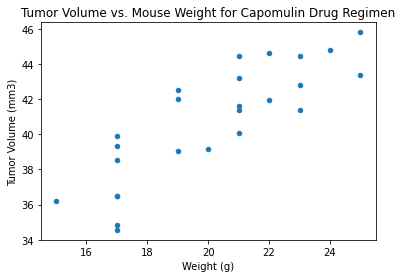

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df_group = capo_df.groupby("Mouse ID")
capo_plot = capo_df_group.mean()
capo_plot = capo_plot[["Weight (g)", "Tumor Volume (mm3)"]]
capo_plot.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", title = "Tumor Volume vs. Mouse Weight for Capomulin Drug Regimen")

## Correlation and Regression

Text(20, 36, 'r = 0.84')

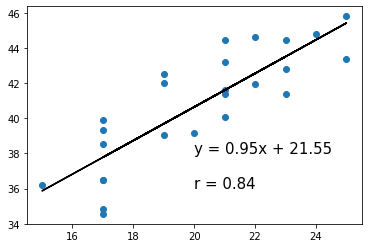

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_plot["Weight (g)"]
y_values = capo_plot["Tumor Volume (mm3)"]

corr = round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, r_values, "black")
plt.annotate(line_eq,(20,38),fontsize=15,color="black")
plt.annotate(f"r = {corr}",(20,36), fontsize=15, color="black")